<a href="https://colab.research.google.com/github/IaraSelva/machine_learning/blob/main/linear_regression_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


In [ ]:
#This time pandas is forbidden, you have to use only numpy
import numpy as np

In [ ]:
# Read the data from the CSV file with read from Numpy
data = np.genfromtxt('Salary_dataset.csv', delimiter=',', skip_header=1, usecols=(1,2))

print(data)

[[1.20000e+00 3.93440e+04]
 [1.40000e+00 4.62060e+04]
 [1.60000e+00 3.77320e+04]
 [2.10000e+00 4.35260e+04]
 [2.30000e+00 3.98920e+04]
 [3.00000e+00 5.66430e+04]
 [3.10000e+00 6.01510e+04]
 [3.30000e+00 5.44460e+04]
 [3.30000e+00 6.44460e+04]
 [3.80000e+00 5.71900e+04]
 [4.00000e+00 6.32190e+04]
 [4.10000e+00 5.57950e+04]
 [4.10000e+00 5.69580e+04]
 [4.20000e+00 5.70820e+04]
 [4.60000e+00 6.11120e+04]
 [5.00000e+00 6.79390e+04]
 [5.20000e+00 6.60300e+04]
 [5.40000e+00 8.30890e+04]
 [6.00000e+00 8.13640e+04]
 [6.10000e+00 9.39410e+04]
 [6.90000e+00 9.17390e+04]
 [7.20000e+00 9.82740e+04]
 [8.00000e+00 1.01303e+05]
 [8.30000e+00 1.13813e+05]
 [8.80000e+00 1.09432e+05]
 [9.10000e+00 1.05583e+05]
 [9.60000e+00 1.16970e+05]
 [9.70000e+00 1.12636e+05]
 [1.04000e+01 1.22392e+05]
 [1.06000e+01 1.21873e+05]]


In [ ]:
# Separate the features (YearsExperience) from the target variable (Salary)
X = data[:, 0]
y = data[:, 1]

print(X, y)

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6] [ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


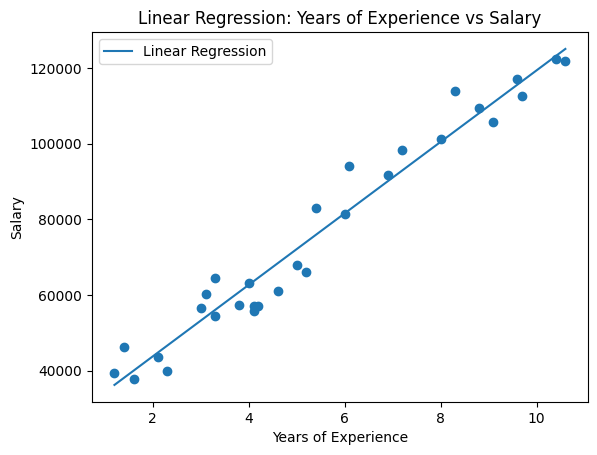

In [ ]:
#This time seaborn is forbidden, you have to find a library that works with numpy
import numpy as np
import matplotlib.pyplot as plt


# Perform linear regression - the third parameter at the polifity function represents the degree of the polynomial to fit the data. For linear regression this value is 1
coefficients = np.polyfit(X, y, 1)
m, b = coefficients

# Create regression line - that's the the equation of a straight line
# regression_line is y, the dependant variable, in this case salary
# X is the independant variable, in this case years of experience
# m and b are variables that are used to find the best fit of the line to represent the data
# m is basically the slope of the line, which represents how much years of experience is needed to increase salary
# b represents the interception point between X and y
regression_line = m*X + b

# Plot data points
plt.scatter(X, y)

# Plot regression line
plt.plot(X, regression_line, label='Linear Regression')

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Years of Experience vs Salary')

# Add legend
plt.legend()

# Show plot
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Let's create a function that displays the point line with the bar.

def visualize(theta, X, y):

    # Add a column of ones to X for the intercept - this functions is needed to adjust the dimensions of the array X and theta. without that a mismatch error is produced
    X_with_intercept = np.column_stack((np.ones(len(X)), X))

    # Compute the regression line
    regression_line = np.dot(X_with_intercept, theta)

    # Plot data points
    plt.scatter(X, y)

    # Plot regression line
    plt.plot(X, regression_line, label="Linear Regression")

    # Add labels and title
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.title('Linear Regression Visualization')

    # Add legend
    plt.legend()

    # Show plot
    plt.show()

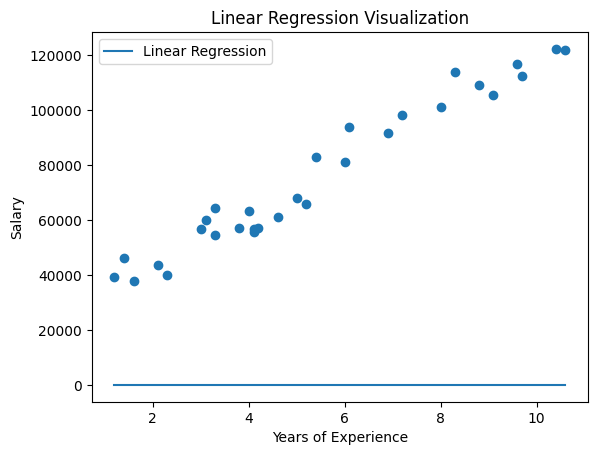

In [ ]:
# Ok, let's test our function now, you should get a result comparable to this one

# here, theta represents the parameters of the linear regression model (e.g., slope and intercept)
theta = np.zeros(2)
visualize(theta, X, y)

In [ ]:
# Create a function that multiplies each element of the matrix X by the slope of the model (theta[1]),
#followed by the addition of the intercept of the model (theta[0]), thus producing the predictions of the simple linear regression model.

def predict(X, theta):
    """
    Predicts the target variable using a simple linear regression model.

    Parameters:
    - X: Input matrix (features), shape (m, n)
        m represents the number of samples (rows).
        n represents the number of features (columns).
        So, the shape of X is (m, n).

    - theta: Model parameters (slope and intercept), shape (2,)
        The first element represents the intercept.
        The second element represents the slope.
        So, the shape of theta is (2,).

    Returns:
    - predictions: Predicted target variable, shape (m,)
        m represents the number of samples (same as input X).
        So, the shape of predictions is (m,).
    """
    # Extract slope and intercept from theta
    # theta[0] corresponds to the intercept or coeficient
    # theta[1] corresponds to the slope
    slope = theta[1]
    intercept = theta[0]

    # Compute predictions using the simple linear regression formula y=mx+b
    predictions = X * slope + intercept

    return predictions


In [ ]:
def fit(X, y, theta, alpha, num_iters):
    # Initialize some useful variables
    m = X.shape[0] # this function calculates the size of the sample

    # Loop over the number of iterations
    for _ in range(num_iters):
        # Compute predictions
        # this function is using the straight line equation y = mx + b to calcuate the predict values
        # using theta (intercept and slope) where m is the slope (theta[1]) and b is the intercept (theta[0])
        predictions = X * theta[1] + theta[0]

        # Compute errors - this function calculates the difference between the predictions and the actual value for each sample
        errors = predictions - y

        # Update parameters using gradient descent
        gradient_intercept = (1/m) * np.sum(errors) # it calculates of the average errors across all samples
        gradient_slope = (1/m) * np.dot(X, errors) # it calculates the product between the matrix X and the errors
        theta[0] -= alpha * gradient_intercept # it updates the intercept and slope values
        theta[1] -= alpha * gradient_slope # it returns an update value of theta (parameters) after a n of iterations
        # alpha is the learning rate, which determines the size of the step taken in the direction of the gradient to update the parameters

    return theta

In [ ]:
# To begin, we'll set alpha to 0.01 and num_iters to 1000

'''
alpha: This parameter represents the learning rate (alpha), which controls the size of the steps taken during each iteration of gradient descent.
A smaller learning rate leads to slower convergence but may result in more precise parameter estimates.
Conversely, a larger learning rate may lead to faster convergence but risks overshooting the minimum of the cost function.

num_iters: This parameter specifies the number of iterations of gradient descent that the fit function will perform.
During each iteration, the function updates the model parameters theta in the direction that minimizes the cost function.


After the fit function is called with these parameters,
it performs gradient descent to optimize the model parameters theta based on the input data X and target variable y.
The function returns the final optimized parameters finetuned_theta,
which represent the model parameters that best fit the given data according to the chosen optimization criteria.
'''


theta = np.zeros(2)
finetuned_theta = fit(X, y, theta, 0.01, 1000)
print(finetuned_theta)
#You should have a result similar to this one: [21912.58918422329, 9880.814004608217]

[21912.58918422  9880.81400461]


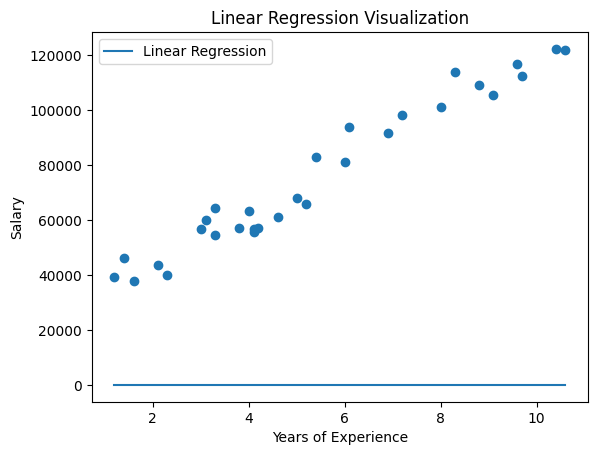

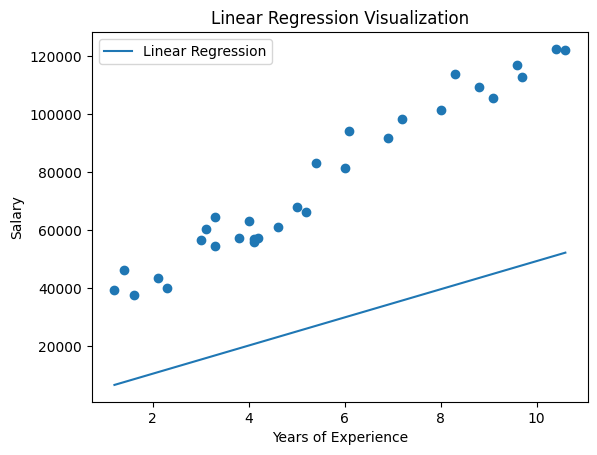

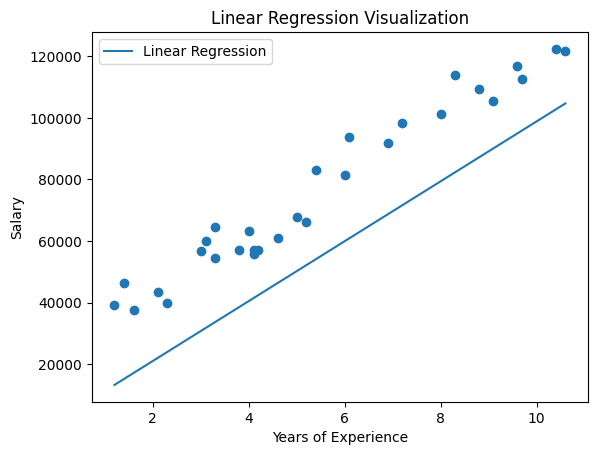

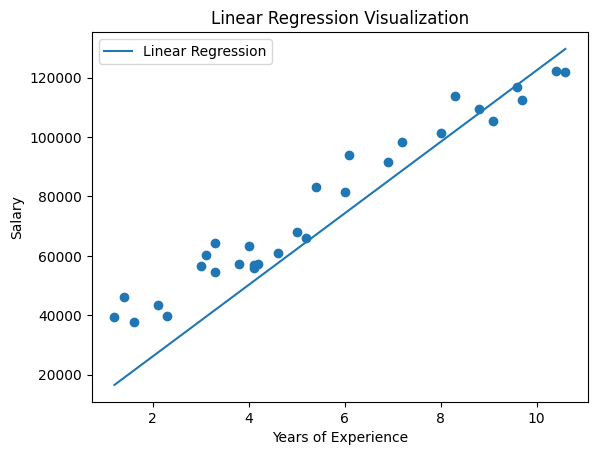

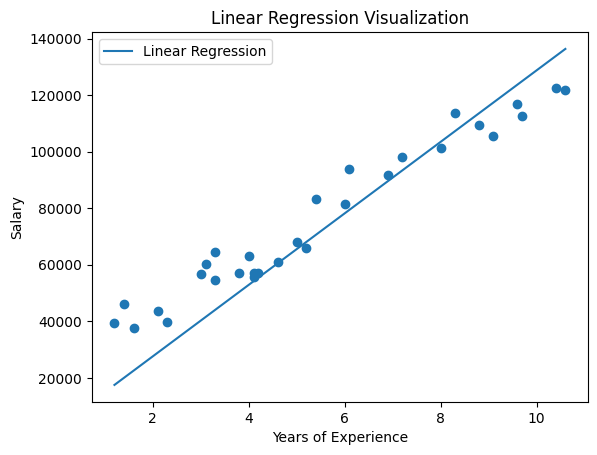

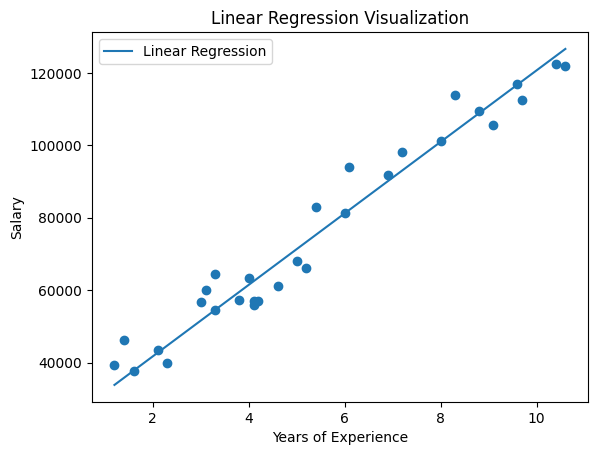

In [ ]:
# Ok, let's test our function now, you should get a result comparable to this one
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 0), X, y)
visualize(fit(X, y, theta, 0.01, 1), X, y)
visualize(fit(X, y, theta, 0.01, 2), X, y)
visualize(fit(X, y, theta, 0.01, 3), X, y)
visualize(fit(X, y, theta, 0.01, 4), X, y)
visualize(fit(X, y, theta, 0.01, 1000), X, y)

In [ ]:
'''
The cost function calculates the mean squared error (MSE)
between the predicted and actual target values of a linear regression model,
providing a measure of how well the model fits the training data.
'''

def cost(X, y, theta):
    # Calculate the difference between model predictions and actual target values
    predictions = X * theta[1] + theta[0]
    errors = predictions - y

    # Calculate the squared sum of the loss and scale it by 1/(2 * number of samples)
    squared_errors = np.square(errors)
    cost = np.mean(squared_errors) / 2

    # Return the computed cost as a measure of model fit
    return cost


In [ ]:
# Test it with theta = [0,0]. You should get approximately 3251553638.

cost_for_theta_zero = cost(X, y, [0, 0])
print(cost_for_theta_zero)

3251553638.866667


In [ ]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]  # Number of training examples
    J_history = []  # List to store cost values at each iteration


    # Loop over the specified number of iterations
    for itr in range(num_iters):
        # Calculate the loss (difference between predictions and actual values)
        predictions = predict(X, theta)
        errors = predictions - y

        # Update the temporary values of theta for both coefficients using the gradient descent formula
        gradient = np.dot(X.T, errors) / m

        # Update the theta values
        theta -= alpha * gradient

        # Calculate and append the cost for the current theta values to the history list
        cost = (1/(2 * m)) * np.sum(np.square(errors))
        J_history.append(cost)

        # Perform one iteration of gradient descent (update theta values)

    # Return the final theta values and the list of cost values over iterations
    return (theta, J_history)

In [ ]:
# First, we initialize theta to zero
theta = np.zeros(2)

# Start the training using your new function
theta, J_history = fit_with_cost(X, y, theta, 0.001, 100)

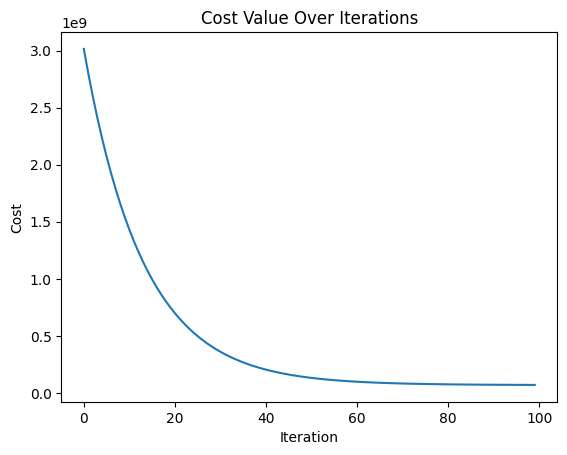

In [ ]:
#You have to reproduce this graph

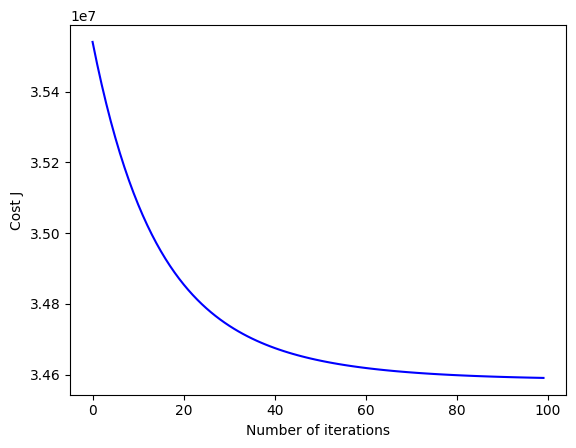

In [ ]:
theta, J_history = fit_with_cost(X, y, theta, 0.001, 100)

plt.plot(np.arange(100), J_history, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [ ]:
# Years of experience of the person you want to predict the salary for
years_experience = 10

# Predict the salary
predicted_salary = predict(years_experience, theta)

# Display the predicted salary
print("Predicted salary for {} years of experience {}".format(years_experience, predicted_salary))

Predicted salary for 10 years of experience 125501.4829405962
